<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Logistic_Regression(Part_5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Understanding Logistic Regression and its Loss Function

Logistic Regression is a **classification algorithm**, not a regression algorithm in the traditional sense, despite its name. It's used to predict the probability that an input belongs to a certain class. For binary classification, it typically outputs a probability between 0 and 1.

#### The Sigmoid Function

The core of logistic regression is the **sigmoid function** (also known as the logistic function). This function takes any real-valued number and maps it to a value between 0 and 1. It's defined as:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

Where $z$ is a linear combination of the input features and their corresponding weights: $z = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n = \mathbf{w}^T\mathbf{x}$.

The output of the sigmoid function, $\hat{y} = P(y=1|x)$, represents the predicted probability that the input $x$ belongs to class 1.

#### Why not use Mean Squared Error (MSE) as a Loss Function?

In linear regression, we typically use Mean Squared Error (MSE) as the loss function. However, for logistic regression, MSE is problematic for several reasons:

1.  **Non-convexity**: When MSE is applied to the sigmoid function's output, the resulting loss function becomes non-convex. This means it can have many local minima, making it difficult for optimization algorithms (like gradient descent) to find the global minimum and thus, the optimal set of weights.
2.  **Vanishing Gradients**: The sigmoid function has a flat gradient in its tails (for very large positive or negative values of $z$). If MSE were used, the gradients would also become very small, leading to slow learning or even stalling the optimization process.

#### The Cross-Entropy Loss (Log Loss)

To overcome these issues, logistic regression uses the **Cross-Entropy Loss**, also known as **Log Loss**. This loss function is derived from the principle of maximum likelihood estimation and is convex, making it suitable for optimization.

For a single training example $(x, y)$, where $y$ is the true label (0 or 1) and $\hat{y}$ is the predicted probability $P(y=1|x)$, the loss function is defined as:

$$ L(\hat{y}, y) = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})] $$

Let's analyze this formula:

*   **If the true label $y = 1$**: The loss simplifies to $-[1 \cdot \log(\hat{y}) + (1 - 1) \cdot \log(1 - \hat{y})] = -\log(\hat{y})$.
    *   If $\hat{y}$ (predicted probability of being 1) is close to 1, then $\log(\hat{y})$ is close to 0, and the loss is small.
    *   If $\hat{y}$ is close to 0, then $\log(\hat{y})$ approaches $-\infty$, and the loss becomes very large (punishing the model heavily).

*   **If the true label $y = 0$**: The loss simplifies to $-[0 \cdot \log(\hat{y}) + (1 - 0) \cdot \log(1 - \hat{y})] = -\log(1 - \hat{y})$.
    *   If $\hat{y}$ (predicted probability of being 1) is close to 0 (meaning $1 - \hat{y}$ is close to 1), then $\log(1 - \hat{y})$ is close to 0, and the loss is small.
    *   If $\hat{y}$ is close to 1 (meaning $1 - \hat{y}$ is close to 0), then $\log(1 - \hat{y})$ approaches $-\infty$, and the loss becomes very large.

**In summary, the cross-entropy loss heavily penalizes the model when it is confident about an incorrect prediction and gives a small penalty when it is confident about a correct prediction.**

#### Cost Function (Average Loss)

For a dataset with $m$ training examples, the **cost function** (often denoted as $J(\mathbf{w})$) is the average of the individual losses over all training examples:

$$ J(\mathbf{w}) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)})] $$

The goal of logistic regression training is to find the weights $\mathbf{w}$ that **minimize** this cost function $J(\mathbf{w})$. This is typically achieved using optimization algorithms like Gradient Descent.

Cross-entropy loss is also fundamental in many other classification algorithms, especially deep learning models, due to its effectiveness in handling probabilistic predictions.

#Log Loss Function in Code

In [7]:
import numpy as np

def log_loss(y, y_hat):
    # Avoid log(0)
    epsilon = 1e-15
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)

    loss = -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss


#See Loss Behavior

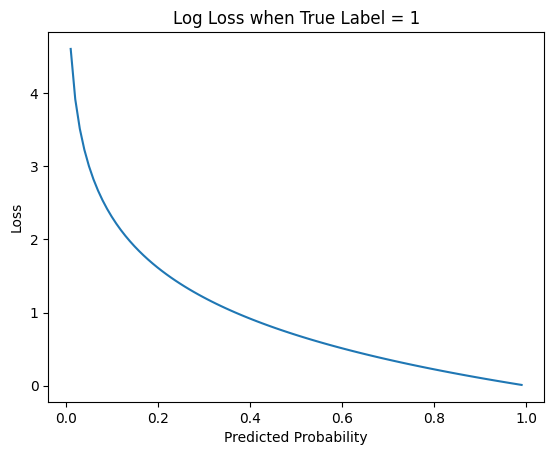

In [8]:
import matplotlib.pyplot as plt

y_true = 1
probs = np.linspace(0.01, 0.99, 100)

losses = [log_loss(y_true, p) for p in probs]

plt.plot(probs, losses)
plt.title("Log Loss when True Label = 1")
plt.xlabel("Predicted Probability")
plt.ylabel("Loss")
plt.show()


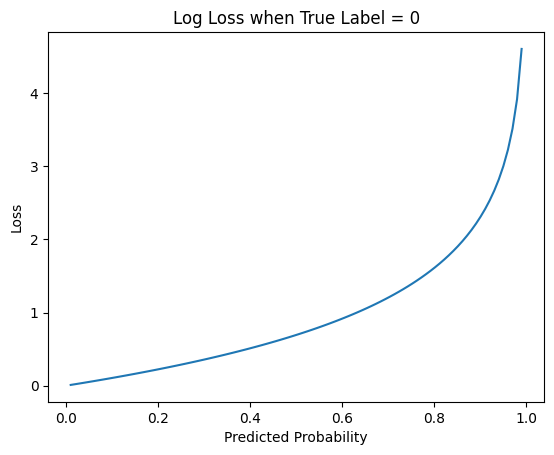

In [9]:
y_true = 0
losses = [log_loss(y_true, p) for p in probs]

plt.plot(probs, losses)
plt.title("Log Loss when True Label = 0")
plt.xlabel("Predicted Probability")
plt.ylabel("Loss")
plt.show()


#Logistic Regression

In [10]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_classes=2,
    n_informative=2,
    n_redundant=0,
    random_state=42
)


In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [12]:
def logistic_regression(X, y, epochs=200, lr=0.1):

    # Add bias column
    X = np.insert(X, 0, 1, axis=1)

    w = np.zeros(X.shape[1])
    n = X.shape[0]

    loss_history = []

    for epoch in range(epochs):

        # Forward
        z = np.dot(X, w)
        y_hat = sigmoid(z)

        # Compute loss (mean log loss)
        loss = np.mean(log_loss(y, y_hat))
        loss_history.append(loss)

        # Gradient
        gradient = np.dot(X.T, (y - y_hat)) / n

        # Update
        w = w + lr * gradient

    return w, loss_history


In [13]:
w, loss_history = logistic_regression(X, y)
print("Final Weights:", w)


Final Weights: [-0.08765813  2.04154383  0.1577463 ]


#Visualization — Loss Decreasing

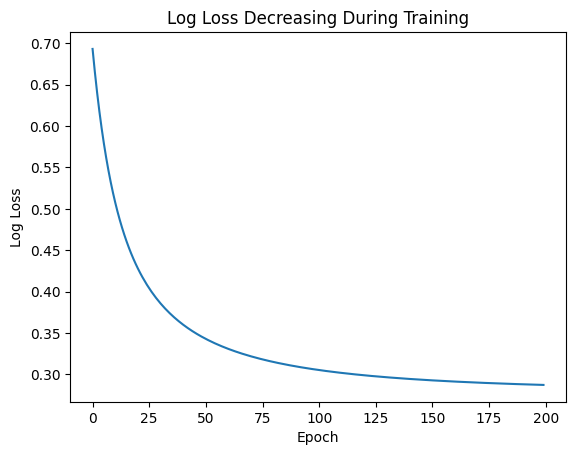

In [14]:
plt.plot(loss_history)
plt.title("Log Loss Decreasing During Training")
plt.xlabel("Epoch")
plt.ylabel("Log Loss")
plt.show()


#Decision Boundary

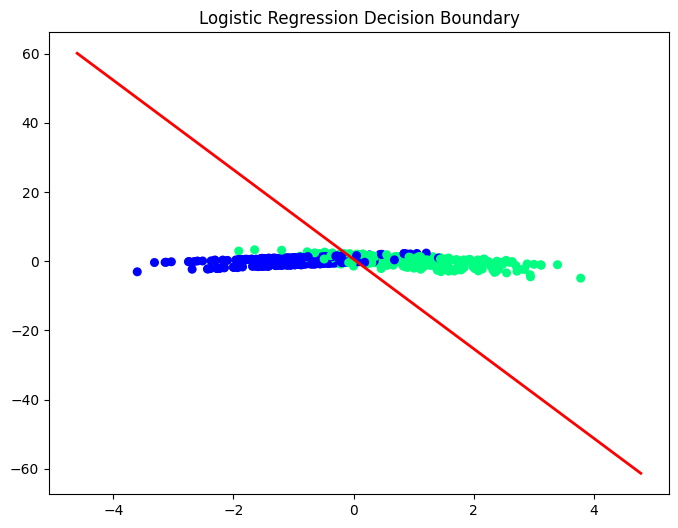

In [15]:
# Extract parameters
intercept = w[0]
coef = w[1:]

m = -(coef[0] / coef[1])
b = -(intercept / coef[1])

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
x_vals = np.linspace(x_min, x_max, 100)
y_vals = m * x_vals + b

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=30)
plt.plot(x_vals, y_vals, color='red', linewidth=2)
plt.title("Logistic Regression Decision Boundary")
plt.show()


#Gradient Descent Using Logistic Regression

1. Idea of Logistic Regression

Logistic Regression is used for binary classification (0 or 1).

Instead of predicting a straight line like Linear Regression, it predicts probability using the Sigmoid function.

### Sigmoid Function
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

where

$z = wX + b$

Output range: 0 to 1

Decision rule:

*   If $p \ge 0.5$ → Class 1
*   If $p < 0.5$ → Class 0

2. Why Gradient Descent?

We need to find weights $w$ and bias $b$ that minimize the error.

But for logistic regression, we cannot use MSE.
Instead we use Log Loss (Binary Cross Entropy).

3. Loss Function (Log Loss)
$$L = -\frac{1}{n} \sum [y \log(p) + (1 - y) \log(1 - p)]$$

where:

*   $y$ = actual label
*   $p$ = predicted probability

Goal: Minimize this loss using Gradient Descent

4. Gradient Descent Update Rule

Steps:

*   Compute prediction
    $p = sigmoid(Xw + b)$

*   Compute error
    $error = p - y$

*   Compute gradients
    $dw = \frac{1}{n} X^T (p - y)$
    $db = \frac{1}{n} \sum (p - y)$

*   Update weights
    $w = w - \alpha \cdot dw$
    $b = b - \alpha \cdot db$

where $\alpha$ = learning rate

In [16]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression using Gradient Descent
class LogisticGD:

    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize parameters
        self.w = np.zeros(n_features)
        self.b = 0

        for i in range(self.epochs):

            # Linear combination
            z = np.dot(X, self.w) + self.b

            # Prediction
            y_pred = sigmoid(z)

            # Gradients
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            # Update
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # Loss (optional)
            if i % 100 == 0:
                loss = -np.mean(y*np.log(y_pred+1e-8) + (1-y)*np.log(1-y_pred+1e-8))
                print(f"Epoch {i}, Loss: {loss}")

    def predict_proba(self, X):
        z = np.dot(X, self.w) + self.b
        return sigmoid(z)

    def predict(self, X):
        probs = self.predict_proba(X)
        return (probs >= 0.5).astype(int)


In [17]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(
    n_samples=200,
    n_features=3,
    n_informative=2,   # Increase
    n_redundant=0,
    random_state=42
)



# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train
model = LogisticGD(lr=0.1, epochs=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Epoch 0, Loss: 0.6931471605599454
Epoch 100, Loss: 0.38367311630965106
Epoch 200, Loss: 0.371242925234427
Epoch 300, Loss: 0.36874880567548535
Epoch 400, Loss: 0.3680618454757608
Epoch 500, Loss: 0.36784738200853145
Epoch 600, Loss: 0.3677762697944403
Epoch 700, Loss: 0.3677519248312998
Epoch 800, Loss: 0.3677434402363612
Epoch 900, Loss: 0.3677404526539859
Accuracy: 0.875


#Plot Decision Boundary

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Dataset (2 features only for visualization)
X, y = make_classification(n_samples=200, n_features=2,
                           n_redundant=0, n_clusters_per_class=1,
                           random_state=42)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [19]:
model = LogisticGD(lr=0.1, epochs=1000)
model.fit(X_train, y_train)


Epoch 0, Loss: 0.6931471605599454
Epoch 100, Loss: 0.39123009289141863
Epoch 200, Loss: 0.38363273634974465
Epoch 300, Loss: 0.38248676019741196
Epoch 400, Loss: 0.38222843935418593
Epoch 500, Loss: 0.38215513124889555
Epoch 600, Loss: 0.382130928394364
Epoch 700, Loss: 0.38212216408176536
Epoch 800, Loss: 0.38211882363718386
Epoch 900, Loss: 0.38211751625155366


In [20]:
def plot_decision_boundary(model, X, y):
    # Feature range
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Create grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Predict for each grid point
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid)
    probs = probs.reshape(xx.shape)

    # Plot contour
    plt.contourf(xx, yy, probs, alpha=0.3)

    # Plot actual data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Logistic Regression Decision Boundary")
    plt.show()


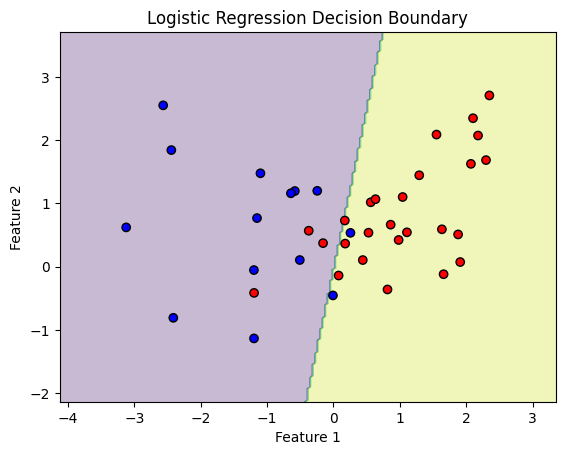

In [21]:
plot_decision_boundary(model, X_test, y_test)
